## Data Ingestion and Cleaning

In [1]:
import pandas as pd
d = pd.read_csv("housing.csv")

In [2]:
d.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [3]:
cols = ['price','bedrooms','bathrooms','sqft_living']
num_data = d[cols]

In [4]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(num_data)

## Deciding the optimum number of clusters

In [5]:
import sklearn.cluster as cluster

In [6]:
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
compactness = []
for k in ks:
    mod = cluster.KMeans(n_clusters=k)
    mod = mod.fit(scaled_data)
    compactness.append(mod.inertia_)   

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

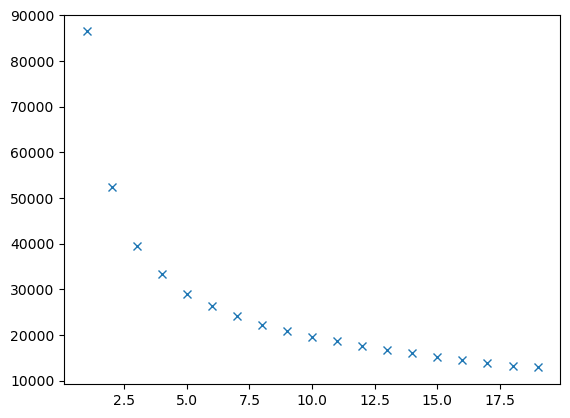

In [8]:
plt.plot(ks,compactness, "x")

In [9]:
### 3,5,8 clusters look okay
mod3 = cluster.KMeans(n_clusters=3).fit(num_data)
mod5 = cluster.KMeans(n_clusters=5).fit(num_data)
mod8 = cluster.KMeans(n_clusters=8).fit(num_data)

In [10]:
### How will I find if these clusters are interesting to look at?
def get_profiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().divide(data.drop('Labels',axis=1).mean(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

In [11]:
get_profiles(num_data,mod3)

/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_7795/3867741299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels']=kmeans.labels_


,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.694223,0.947431,0.899615,0.835553,15095
1,1.498599,1.109698,1.190584,1.309118,5914
2,3.759911,1.239693,1.642706,2.083111,604


**Comment**:
- Cluster 0's price is 31 % less than the average while the number of bedrooms are 6% less,bathromms 11% less than the average
- Cluster 1's price is 49% more than the average, while the number of bedrooms are only 10% more and bathrooms is 19% more
- Cluster 2's price is 275% more than the average, while the number of bedrooms are 23% more and bathrooms are 64% more

In [24]:
### 5 Cluster Model
get_profiles(num_data,mod5)

/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_7478/3098394805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels']=kmeans.labels_


,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,1.527975,1.119837,1.208506,1.349767,3721
1,5.237377,1.296283,1.849709,2.464887,184
2,0.549918,0.922581,0.839453,0.760822,9083
3,0.967554,1.001581,1.010354,0.981744,7680
4,2.685722,1.201716,1.472519,1.784807,945


**Comments**:
- Only cluster 2 and 3 have prices less than the average
- Cluster 2's price is 44% less than average but number of bedrooms are only 8% less and area is 24% less
- Cluster 3's price is 4% less and bedrooms and bathrooms are same as the average area is only 2 % less
- Cluster 3 homes look like a deal

In [25]:
### 8 Cluster Model
get_profiles(num_data,mod8)

/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_7478/3098394805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels']=kmeans.labels_


,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.491664,0.908162,0.806605,0.725243,6512
1,1.577352,1.131290,1.230754,1.388922,2567
2,5.278792,1.303367,1.814920,2.440479,122
3,0.789672,0.966496,0.952643,0.888852,6452
4,2.321627,1.190612,1.420039,1.689585,823
5,3.370469,1.227398,1.587484,1.981250,364
6,1.129716,1.040963,1.062239,1.078851,4763
7,10.486307,1.542641,2.718988,4.196837,10


**Comments**:
- Only cluster 0 and 3 have prices less than the average.
- Cluster 3's prices are 22% less than the average with only ~5% less bedrooms and bathrooms and 12% less area than average.
- Cluster 3 homes also look like a deal

#### Finding the location of the ideal properties 

In [13]:
d['clust_5'] = mod5.labels_
d['clust_8'] = mod8.labels_

In [14]:
d[d['clust_5']==3][['lat','long']]

,lat,long
5,47.6561,-122.005
21,47.5316,-122.233
49,47.4041,-122.451
69,47.6303,-122.215
125,47.6141,-122.212
...,...,...
21551,47.6018,-122.060
21568,47.5990,-122.197
21590,47.6502,-122.066
21597,47.5653,-122.223


In [15]:
d[d['clust_8']==3][['lat','long']]

,lat,long
5,47.6561,-122.005
49,47.4041,-122.451
69,47.6303,-122.215
70,47.6525,-122.160
91,47.6506,-122.391
...,...,...
21532,47.5914,-122.027
21548,47.4543,-121.778
21551,47.6018,-122.060
21590,47.6502,-122.066
